In [3]:
import re
import numpy as np
import pandas as pd
import openpyxl

import os
from bs4 import BeautifulSoup
from lxml import html
import warnings

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import io
import json

import plotly.graph_objects as go
import plotly.express as px
import plotly as py

pd.set_option('display.max_rows',999)
pd.set_option('display.min_rows',4)
pd.set_option('display.float_format', '{:,.2f}'.format)

warnings.filterwarnings("ignore")

20 colores

In [4]:
cl = [e for e in sns.color_palette('rocket',20)]
cl2 = [(int(t[0]*255), int(t[1]*255) , int(t[2]*255)) for t in cl]
colors = ['#%02x%02x%02x' % e for e in cl2]

idx

In [5]:
idx = pd.IndexSlice

Bases

In [6]:
dbox = r'c:/Users/Franco/Dropbox/files/clean/'
files = os.listdir(dbox)

In [11]:
sectores = pd.read_excel(dbox+'sectores.xlsx',index_col=[0,1])
laboral = pd.read_excel(dbox+'laboral_final(ajustes).xlsx',index_col=[0,1])
acceso = pd.read_excel(dbox+'accesom_2.xlsx',index_col=[0,1])
accesom = pd.read_excel(dbox+'horas_msII.xlsx',index_col=[0,1]) 
cw = pd.read_excel(dbox+'cwpops.xlsx',index_col=[0,1])
latlongs = pd.read_excel(dbox+'latlongs.xlsx',index_col=[0,1])
msa = pd.read_excel(dbox+'metro_areas.xlsx',index_col=[0,1])
prope_com = pd.read_excel(dbox+'prope_comercial.xlsx',index_col=[0,1])
prope_vi = pd.read_csv(dbox+'prope_vivienda.csv',index_col=[0,1])
es = pd.read_excel(dbox+'es.xlsx',index_col=[0,1])
hom = pd.read_excel(dbox+'homicidios.xlsx',index_col=[0,1])
db = pd.read_excel(dbox+'dbiz.xlsx',index_col=[0,1])

### Ciudades de referencia

In [12]:
city = ('Mexico','Puebla')
ref = city + []
ref_prom = ref + ['Promedio '+city[0],'Promedio Latam']

In [10]:
comp = cw.loc[idx[:,ref],'pops'].to_frame().join(laboral.loc[:,['Salario Horario (PPP 2011)','Tasa de Desempleo Total','% población con secundario completo Total']]).join(acceso.loc[:,['cutoff_0','cutoff_9']]).join(sectores.loc[:,['Ratio Agro','Ratio Baja Tec','Ratio Resto Ind']])

In [11]:
comp = comp.rename(columns={'pops':'Población estimada (millones)','cutoff_0':'Masa Salarial como proporción del país','cutoff_9':'Proporción de la masa salarial del país a la que se accede en < 9 hs'})

In [12]:
print(BeautifulSoup(comp.sort_values(['Country','Salario Horario (PPP 2011)']).to_html(), 'html.parser'))

<table border="1" class="dataframe">
<thead>
<tr style="text-align: right;">
<th></th>
<th></th>
<th>Población estimada (millones)</th>
<th>Salario Horario (PPP 2011)</th>
<th>Tasa de Desempleo Total</th>
<th>% población con secundario completo Total</th>
<th>Masa Salarial como proporción del país</th>
<th>Proporción de la masa salarial del país a la que se accede en &lt; 9 hs</th>
<th>Ratio Agro</th>
<th>Ratio Baja Tec</th>
<th>Ratio Resto Ind</th>
</tr>
<tr>
<th>Country</th>
<th>City</th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
<th></th>
</tr>
</thead>
<tbody>
<tr>
<th>Argentina</th>
<th>Gran Resistencia</th>
<td>0.29</td>
<td>3.77</td>
<td>1.61</td>
<td>43.13</td>
<td>0.01</td>
<td>0.12</td>
<td>0.21</td>
<td>0.57</td>
<td>0.34</td>
</tr>
<tr>
<th>Brasil</th>
<th>Aracaju</th>
<td>0.62</td>
<td>4.43</td>
<td>16.10</td>
<td>36.91</td>
<td>0.01</td>
<td>0.10</td>
<td>1.32</td>
<td>0.74</td>
<td>0.57</td>
</tr>
<tr>
<th rowspan="6" valign="top">Co

Gráfico de Salarios y poblaciones

In [13]:
plot1 = comp.iloc[:,:2].droplevel(0)

In [14]:
proms = pd.concat([cw.loc[:,['pops']].mean().to_frame().T.append(cw.loc['Colombia',['pops']].mean().to_frame().T),pd.Series(laboral.iloc[:,0].mean()).append(pd.Series(laboral.loc['Colombia','Salario Horario (PPP 2011)'].mean())).to_frame()],axis=1).rename(columns={'pops':'Población estimada (millones)',0:'Salario Horario (PPP 2011)'})
proms['City'] = ['Poromedio Latam','Promedio Colombia']
proms = proms.set_index('City')

In [15]:
plot1 = plot1.append(proms)

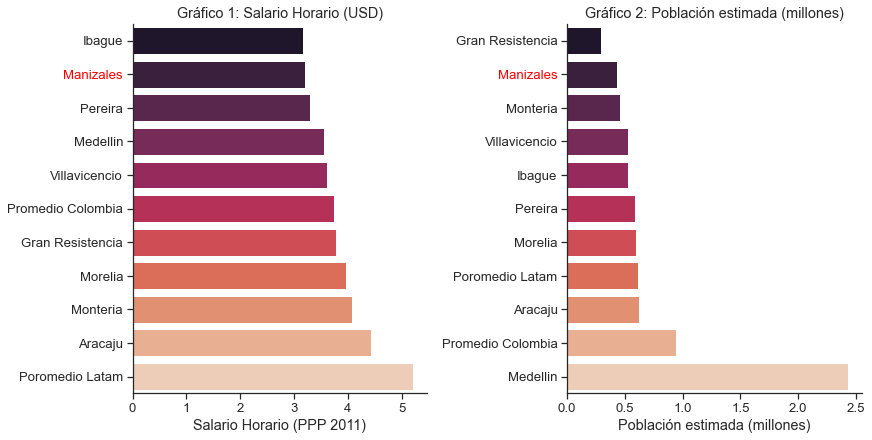

In [19]:
f, axes = plt.subplots(1, 2,figsize=(12,6) ,constrained_layout=True)

sns.barplot(x='Salario Horario (PPP 2011)', y=plot1.sort_values('Salario Horario (PPP 2011)').index, data=plot1.sort_values('Salario Horario (PPP 2011)'),palette='rocket' , orient='h' , ax=axes[0]).set_title('Gráfico 1: Salario Horario (USD)')
sns.barplot(x='Población estimada (millones)', y=plot1.sort_values('Población estimada (millones)').index, data=plot1.sort_values('Población estimada (millones)'),palette='rocket' , orient='h'  ,ax=axes[1]).set_title('Gráfico 2: Población estimada (millones)')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()

plt.ticklabel_format(style='plain', axis='x')
#plt.tight_layout()
#axes[1].get_xaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
axes[0].get_yticklabels()[1].set_color('red')
axes[1].get_yticklabels()[1].set_color('red')

axes[0].set_ylabel('')    
axes[1].set_ylabel('')

plt.savefig("informe/images/wyp.png",bbox_inches='tight')

Scatter

In [13]:
wage_comp = sectores.loc[idx['Colombia',:],['Salario Observado','Salario Estimado','Principal Sector']]
wage_comp = wage_comp.reset_index()

In [19]:
def wc(x):
    if x == 'Agro':
        a = colors[1]
    elif x == 'Baja Tec':
        a = colors[8]
    else:
        a = colors[15]
    return a

In [21]:
wage_comp['color'] = wage_comp['Principal Sector'].apply(lambda x: wc(x))

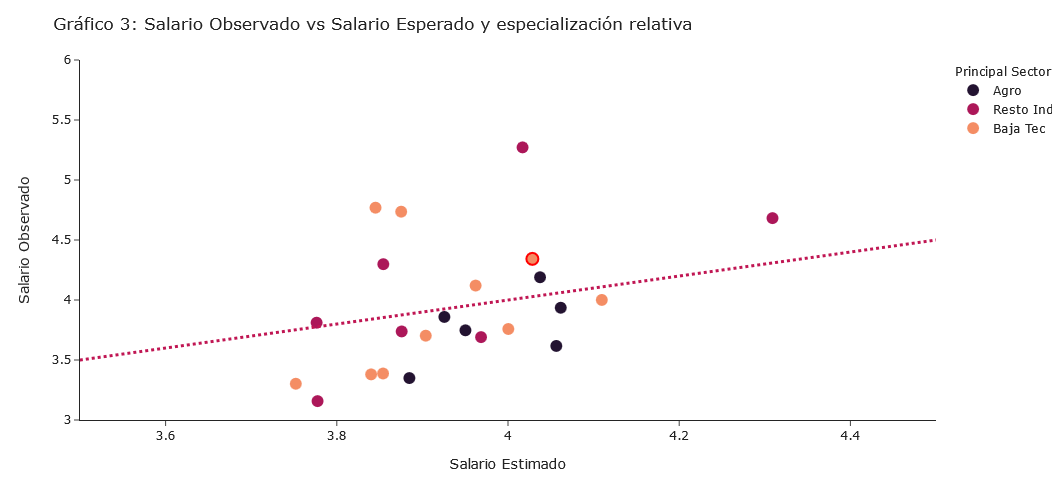

In [28]:
fig = px.scatter(wage_comp[wage_comp['City']!='Manizales'], x="Salario Estimado", y="Salario Observado", color="Principal Sector",
                 hover_data=["City","Salario Observado","Salario Estimado","Principal Sector"],
                 template='simple_white',
                 color_discrete_sequence=[colors[1],colors[8],colors[15]],
                 #color="color",
                 width=750,
                 height=500
                )

fig.add_trace(
        go.Scatter(
        mode='markers',
        x=wage_comp[wage_comp['City']=='Manizales']['Salario Estimado'],
        y=wage_comp[wage_comp['City']=='Manizales']['Salario Observado'],
        marker=dict(
            color=colors[15],
            size=12,
            line=dict(
                color='red',
                width=2
            )
        ),
        showlegend=False,
        text='City: {0}<br />Salario Observado: {1}<br />Salario Estimado: {2}<br />Principal Sector: {3}'.format('Manizales', 4.34, 4.03, 'Ratio Resto Ind'),
        hoverinfo='text'
    )
)



fig.update_traces(marker=dict(size=12),
                  selector=dict(mode='markers')
                 )

fig.update_layout(xaxis_range=[3.5,4.5],
                  yaxis_range=[3,6],
                  title='Gráfico 3: Salario Observado vs Salario Esperado y especialización relativa'
                 )


fig.add_shape( # add a "target" line
    type="line", line_color=colors[9], line_width=3, opacity=1, line_dash="dot",
    x0=3, x1=12, xref="x", y0=3, y1=12, yref="y"
)

fig.show()
fig.write_html(file="informe/images/estimado_vs_observado.html",full_html=False,include_plotlyjs='cdn')

Sectores

In [32]:
w_manizales = sectores.loc[idx[:,'Manizales'],['share_emp_s1', 'share_emp_s2', 'share_emp_s3', 'share_emp_s4',
       'share_emp_s5', 'share_emp_s6', 'share_emp_s7', 'share_emp_s8',
       'share_emp_s9', 'share_emp_s10','Agro', 'Baja Tec', 'Resto Ind',
       'Construcción', 'Comercio', 'Infraestructura', 'Bancos', 'Adm publi',
       'Educ y Salud', 'Serv doméstic']].stack().to_frame().reset_index().rename(columns={'level_2':'Actividad',0:'Proporción'})

In [33]:
w_manizales['Grupo'] = ['Empleo']*10 + ['Masa Salarial']*10

In [34]:
w_manizales = w_manizales.drop(columns=['Country','City'])

In [35]:
w_manizales = w_manizales.replace({'Actividad':dict(zip(w_manizales['Actividad'][:10],w_manizales['Actividad'][10:]))})

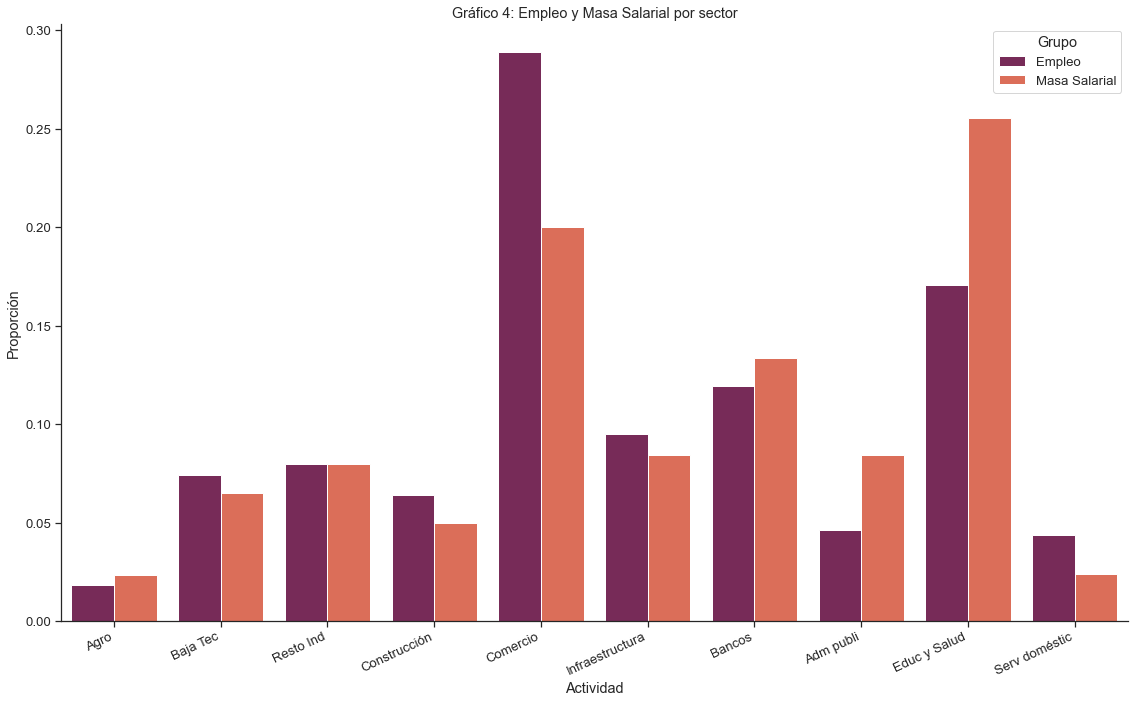

In [38]:
fig, ax = plt.subplots(figsize=(16,10))
g = sns.barplot(x='Actividad', y='Proporción', hue='Grupo', data=w_manizales , palette='rocket' , linewidth=1)

g.set_title('Gráfico 4: Empleo y Masa Salarial por sector')
g.set_xticklabels(w_manizales['Actividad'].unique().tolist() , rotation=25 , ha='right')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()
#plt.legend(bbox_to_anchor=(1.05,1.05), loc="upper right")
plt.savefig("informe/images/wm_sectores.png",bbox_inches='tight')
plt.tight_layout()

Distribución de Actividades

In [39]:
dist = laboral[['Distribución de ocupados según relación laboral Asalariado  (total)',
 'Distribución de ocupados según relación laboral Asalariado (público)',
 'Distribución de ocupados según relación laboral Asalariado (privado)',
 'Distribución de ocupados según relación laboral Patrón o Cuentapropista',
 'Distribución de ocupados según relación laboral Sin salario']].droplevel(0)

In [40]:
mean = dist.mean().to_frame().T
mean['City'] = 'Promedio Latam'
mean = mean.set_index('City')

In [43]:
dist_plot = dist.loc[ref,:].append(dist.loc[('Colombia 2018 (total ciudades)')].to_frame().T.reset_index().rename(columns={'index':'City'}).replace({'City':{'Colombia 2018 (total ciudades)':'Promedio Colombia'}}).set_index('City').append(mean))

In [44]:
dist_plot = dist_plot.sort_values('Distribución de ocupados según relación laboral Asalariado  (total)')

In [45]:
dist_plot = dist_plot.drop(columns='Distribución de ocupados según relación laboral Asalariado  (total)')

In [46]:
dist_plot = dist_plot.rename(columns=dict(zip(dist_plot.columns.tolist(),['Asalariado (público)','Asalariado (privado)','Patrón o Cuentapropista','Sin salario'])))

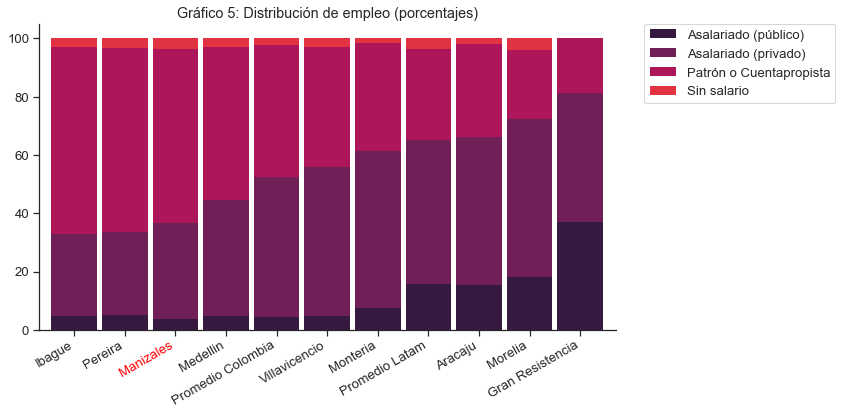

In [55]:
sns.set_palette('rocket')

fig, ax = plt.subplots(1, 1,figsize=(12,6))

dist_plot.plot(kind='bar', stacked=True , ax=ax , color=sns.color_palette() , width=0.9 , linewidth=0.001).set_title('Gráfico 5: Distribución de empleo (porcentajes)')

fig.autofmt_xdate()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.gca().get_xticklabels()[2].set_color('red')
ax.set_xlabel('')
plt.tight_layout()
plt.savefig("informe/images/empleo_dist.png",bbox_inches='tight')

## Disponibilidad de indicadores

### Con Ext

In [49]:
mlab = pd.read_excel(dbox+'mlabi.xlsx',index_col=[0,1])

Medias

In [50]:
mlab_medias = mlab.mean().to_frame().T.append(mlab.loc['Colombia'].mean().to_frame().T)

In [51]:
mlab_medias['City'] = ['Promedio Latam','Promedio Colombia']

In [52]:
mlab_medias = mlab_medias.set_index(['City'])

Append

In [53]:
mlab_plot = mlab.drop(columns='City Original').droplevel(0).append(mlab_medias).loc[ref_prom,'Median Download'].to_frame()

Plot

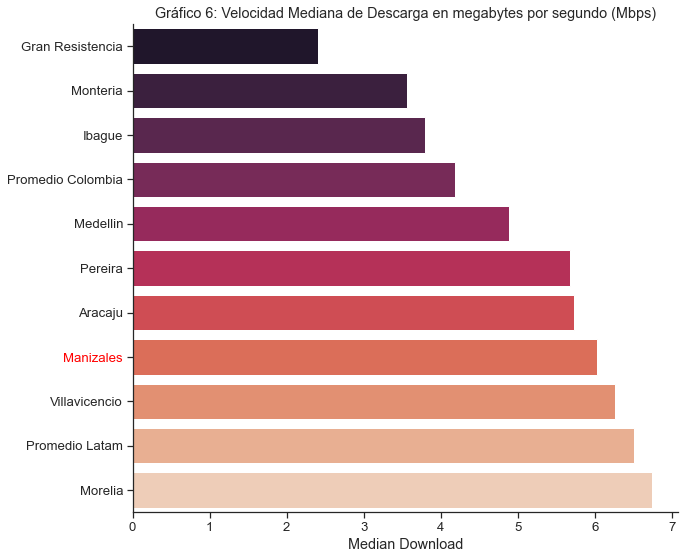

In [57]:
fig, ax = plt.subplots(figsize=(10,8)) #,constrained_layout=True
sns.barplot(x='Median Download', y=mlab_plot.sort_values('Median Download').index, data=mlab_plot.sort_values('Median Download') , palette='rocket' , orient='h' ).set_title('Gráfico 6: Velocidad Mediana de Descarga en megabytes por segundo (Mbps)')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()
plt.tight_layout()
plt.gca().get_yticklabels()[7].set_color('red')
ax.set_ylabel('')    

plt.savefig("informe/images/descarga.png",bbox_inches='tight')

### Acceso a mercados

In [58]:
medias = accesom.loc['Colombia'].mean().to_frame().T.append(accesom.mean().to_frame().T)
medias['City'] = ['Promedio Colombia','Promedio Latam']
medias = medias.set_index(['City'])

In [59]:
acceso_plot = accesom.droplevel(0).append(medias).loc[ref_prom]
plot = acceso_plot.drop(columns=['Población (millones)','Salario Horario (PPP 2011)','Nearest City','Masa Salarial','Masa Salarial (% Total País)','Masa Salarial (Total País)'])

In [60]:
df1 = plot.loc[:,['Horas al {}% de MS'.format(e) for e in [10,20,30,40,50,60,70,80,90,100]]]
df2 = plot.loc[:,['Horas al {}% de MS (Salarios mayores)'.format(e) for e in [10,20,30,40,50,60,70,80,90,100]]]

mydict1 = dict(zip(['Horas al {}% de MS'.format(e) for e in [10,20,30,40,50,60,70,80,90,100]],['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']))
mydict2 = dict(zip(['Horas al {}% de MS (Salarios mayores)'.format(e) for e in [10,20,30,40,50,60,70,80,90,100]],['10%','20%','30%','40%','50%','60%','70%','80%','90%','100%']))

df1 = df1.rename(columns=mydict1).stack().to_frame().reset_index().rename(columns={'level_1':'% de MS',0:'Horas'})
df2 = df2.rename(columns=mydict2).stack().to_frame().reset_index().rename(columns={'level_1':'% de MS',0:'Horas'})

In [156]:
#dict_c = dict(zip(acceso_plot['% de masa salarial'].unique().tolist(),[colors[2],colors[6],colors[12],colors[16]]))
#cols = [colors[e] for e in [0,1,3,5,7,9,11,13,15,17,19]] 

In [114]:
df1.City.unique()

array(['Manizales', 'Pereira', 'Medellin', 'Villavicencio', 'Monteria',
       'Ibague', 'Gran Resistencia', 'Morelia', 'Aracaju',
       'Promedio Colombia', 'Promedio Latam'], dtype=object)

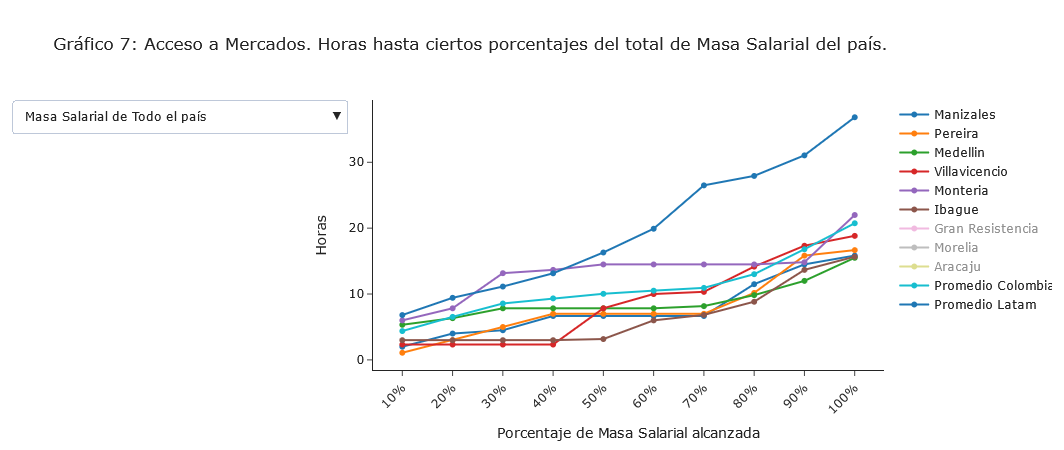

In [117]:
fig1 = go.Figure()

for e in df1.City.unique():
    df = df1[df1['City']==e]
    if 'Promedio' not in e:
        if accesom.loc[idx[:,e],:].index.get_level_values(0)[0] != 'Colombia':
            fig1.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e , visible='legendonly'))    
        else:
            fig1.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e))
    else:
        fig1.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e))
        
fig2 = go.Figure()

for e in df2.City.unique():
    df = df2[df2['City']==e]
    if 'Promedio' not in e:
        if accesom.loc[idx[:,e],:].index.get_level_values(0)[0] != 'Colombia':
            fig2.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e , visible='legendonly'))    
        else:
            fig2.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e))
    else:
        fig2.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e))
        
fig = go.Figure()

for e in df1.City.unique():
    df = df1[df1['City']==e]
    if 'Promedio' not in e:
        if accesom.loc[idx[:,e],:].index.get_level_values(0)[0] != 'Colombia':
            fig.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e , visible='legendonly'))    
        else:
            fig.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e))
    else:
        fig.add_trace(go.Scatter(x=df['% de MS'], y=df['Horas'], name=e))

updatemenus = [
    {
        'buttons': [
            {
                'method': 'update',
                'label': 'Masa Salarial de Todo el país',
                'args': [
                    {'y': [dat.y for dat in fig1.data],
                     'x': [dat.x for dat in fig1.data],
                     'visible':[dat.visible for dat in fig1.data]
                     
                    },  
                ]
            },
            {
                'method': 'update',
                'label': 'Masa Salarial sólo de Ciudades con salarios mayores',
                'args': [
                    {'y': [dat.y for dat in fig2.data],
                     'x':[dat.x for dat in fig2.data],
                     'visible':[dat.visible for dat in fig2.data]
                     
                    },
                ]
            }

        ],
        'direction': 'down',
        'showactive': True,
    }
]        
        
fig = fig.update_layout(template="simple_white" , updatemenus=updatemenus , title_text="Gráfico 7: Acceso a Mercados. Horas hasta ciertos porcentajes del total de Masa Salarial del país." , xaxis={'tickangle':-45} , yaxis_title="Horas" , xaxis_title="Porcentaje de Masa Salarial alcanzada" ) #, xaxis_range=[-0.1,5] , yaxis_range=[0,20]
fig.write_html(file="informe/images/accesoII.html",full_html=False,include_plotlyjs='cdn')

fig.show()        

### Conectividad Interna

Biggest Obstacle

In [261]:
plot = es.loc[:,'Percent of firms choosing transportation as their biggest obstacle'].to_frame()

In [262]:
means = plot.mean().T.to_frame().append(plot.loc['Argentina'].mean().T.to_frame()).rename(columns={0:'Percent of firms choosing transportation as their biggest obstacle'})

In [263]:
means['City'] = ['Promedio Latam','Promedio Argentina']

In [264]:
plot = plot.droplevel(0).append(means.set_index('City'))

In [267]:
ref_es = ref_prom[:4] + ['Ciudad de Buenos Aires','Cali','Parana']+ ref_prom[-2:] 

In [268]:
plotloc = plot.loc[ref_es].reset_index().replace({'City':{'Parana':'Estado de Parana (Curitiba)'}}).sort_values('Percent of firms choosing transportation as their biggest obstacle')

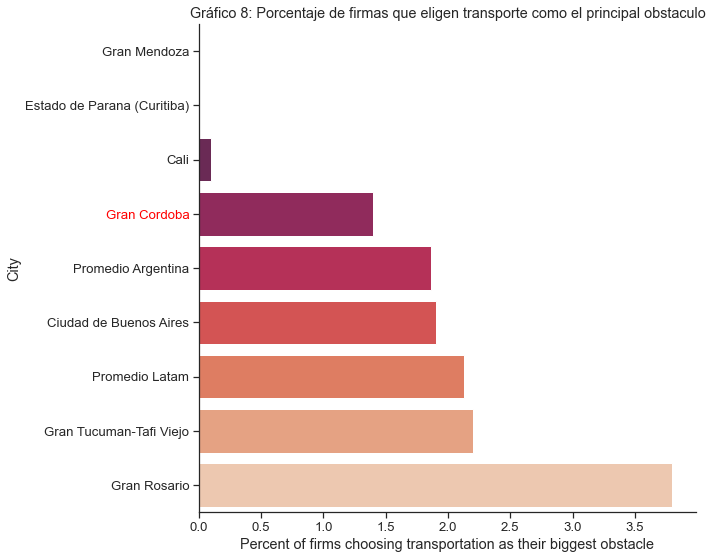

In [279]:
fig, ax = plt.subplots(figsize=(10,8)) #,constrained_layout=True
sns.barplot(x='Percent of firms choosing transportation as their biggest obstacle', y='City', data=plotloc , palette='rocket' , orient='h' ).set_title('Gráfico 8: Porcentaje de firmas que eligen transporte como el principal obstaculo')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()
plt.tight_layout()
plt.gca().get_yticklabels()[3].set_color('red')

plt.savefig("informe/images/big_obs_trans.png",bbox_inches='tight')

### Trabajo y Conocimiento

Firmas que creen que la educación de la fuerza laboral es el principal problema

In [60]:
plot = es.loc[:,'Percent of firms choosing inadequately educated workforce as their biggest obstacle'].to_frame()

In [61]:
means = plot.mean().T.to_frame().append(plot.loc['Argentina'].mean().T.to_frame()).rename(columns={0:'Percent of firms choosing inadequately educated workforce as their biggest obstacle'})

In [62]:
means['City'] = ['Promedio Latam','Promedio Argentina']

In [63]:
plot = plot.droplevel(0).append(means.set_index('City'))

In [64]:
ref_es = ref_prom[:4] + ref_prom[-2:] 

In [65]:
plotloc = plot.loc[ref_es].reset_index().replace({'City':{'Parana':'Estado de Parana (Curitiba)'}}).sort_values('Percent of firms choosing inadequately educated workforce as their biggest obstacle')

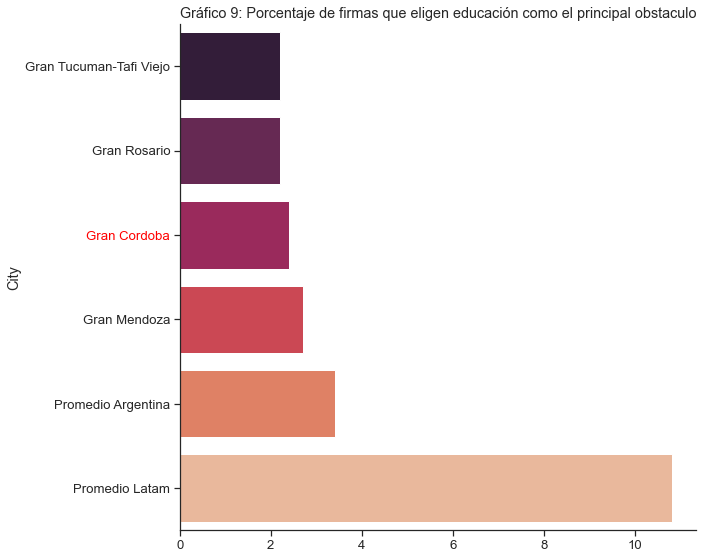

In [72]:
fig, ax = plt.subplots(figsize=(10,8)) #,constrained_layout=True
sns.barplot(x='Percent of firms choosing inadequately educated workforce as their biggest obstacle', y='City', data=plotloc , palette='rocket' , orient='h' ).set_title('Gráfico 9: Porcentaje de firmas que eligen educación como el principal obstaculo')

sns.set(font_scale=1.2)
ax.set_xlabel('')
sns.set_style("ticks")
sns.despine()
plt.tight_layout()
plt.gca().get_yticklabels()[2].set_color('red')

plt.savefig("informe/images/big_obs_edu.png",bbox_inches='tight')

Laboral

In [129]:
medias = laboral.reset_index().loc[laboral.reset_index()['City'].str.contains('(total ciudades)|(Total Ciudades)')].iloc[0,:].to_frame().T.append(laboral.reset_index().loc[laboral.reset_index()['City'].str.contains('(total ciudades)|(Total Ciudades)')].mean().to_frame().T)

In [130]:
medias = medias.drop(columns='Country')
medias['City'] = ['Promedio Colombia','Promedio Latam']

In [131]:
laboral_ref = laboral.droplevel(0).append(medias.set_index('City')).loc[ref_prom,:]

Act

In [133]:
act = laboral_ref[laboral_ref.columns[4:7]]
act['dif'] = act['Tasa de Actividad Hombres'] - act['Tasa de Actividad Mujeres ']
act = act.sort_values('Tasa de Actividad Total')

In [134]:
act['Tasa de Actividad (total)'] = act['Tasa de Actividad Total'] * (-1)

In [135]:
act = act.astype('float')

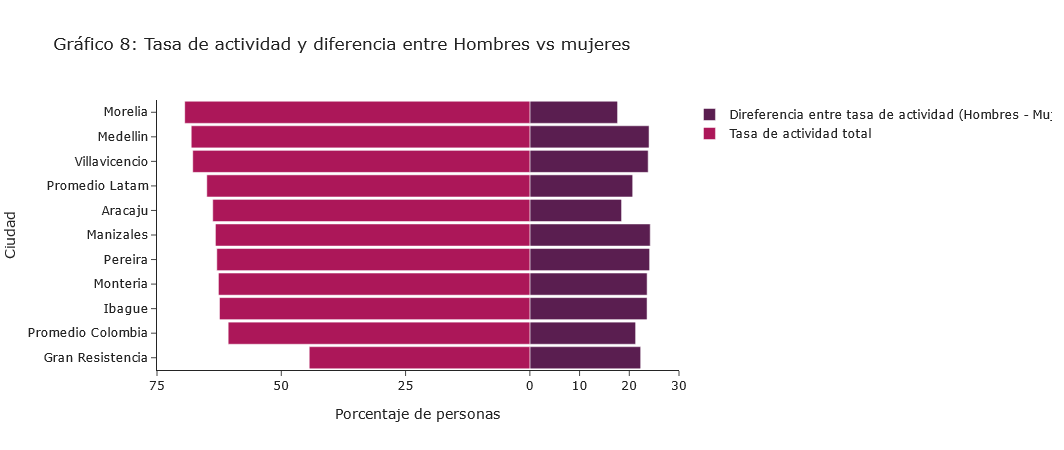

In [160]:
layout = go.Layout(yaxis=go.layout.YAxis(title='Ciudad'),
                   xaxis=go.layout.XAxis(
                       range=[-75, 30],
                       tickvals=[-75, -50, -25, 0, 10, 20, 30],
                       ticktext=[75, 50, 25, 0, 10, 20, 30],
                       title='Porcentaje de personas'),
                    barmode='overlay',
                    bargap=0.1,
                    template="simple_white",
                   title='Gráfico 8: Tasa de actividad y diferencia entre Hombres vs mujeres'
                  )

data = [go.Bar(y=act.index,
               x=act['dif'],
               orientation='h',
               name='Direferencia entre tasa de actividad (Hombres - Mujeres)',
               text=np.round(act['dif'].to_numpy(),2),
               hoverinfo='text',
               marker=dict(color=colors[4]),
                    #hoverlabel=dict(hover_data={act['dif']:':.2f'})
               ),
        go.Bar(y=act.index,
               x=act['Tasa de Actividad (total)'],
               orientation='h',
               name='Tasa de actividad total',
               text= np.round(act['Tasa de Actividad (total)'].to_numpy() * -1,2),
               hoverinfo='text',
               marker=dict(color=colors[8])
               )]


fig = go.Figure(
                data=data,
                layout=layout
)

fig.write_html(file="informe/images/actividad.html",full_html=False,include_plotlyjs='cdn')
fig.show()

Info y desempleo

In [138]:
des = pd.concat([laboral_ref[laboral_ref.columns[1]],laboral_ref[laboral_ref.columns[7]]],axis=1)

In [139]:
des = des.astype('float')

In [140]:
des = des.sort_values('Tasa de Desempleo Total')

In [141]:
des['Tasa de Desempleo (Total)'] = des['Tasa de Desempleo Total'] * (-1)

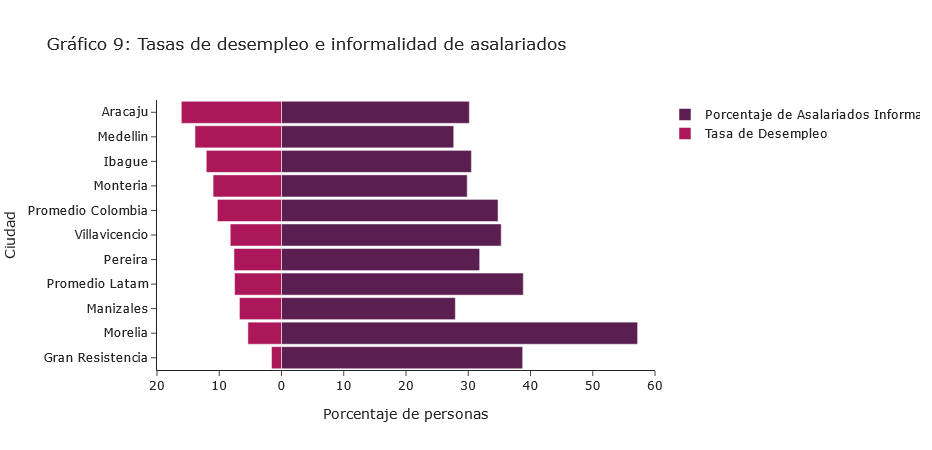

In [161]:
layout = go.Layout(yaxis=go.layout.YAxis(title='Ciudad'),
                   xaxis=go.layout.XAxis(
                       range=[-20, 60],
                       tickvals=[-20, -10, 0, 10, 20, 30, 40, 50 ,60],
                       ticktext=[20, 10, 0, 10, 20, 30, 40, 50, 60],
                       title='Porcentaje de personas'),
                    barmode='overlay',
                    bargap=0.1,
                    template="simple_white",
                   title='Gráfico 9: Tasas de desempleo e informalidad de asalariados'
                  )

data = [go.Bar(y=des.index,
               x=des['% Asalariados Informales Total'],
               orientation='h',
               name='Porcentaje de Asalariados Informales',
               text=np.round(des['% Asalariados Informales Total'].to_numpy(),2),
               hoverinfo='text',
               marker=dict(color=colors[4]),
                    #hoverlabel=dict(hover_data={act['dif']:':.2f'})
               ),
        go.Bar(y=des.index,
               x=des['Tasa de Desempleo (Total)'],
               orientation='h',
               name='Tasa de Desempleo',
               text= np.round(des['Tasa de Desempleo (Total)'].to_numpy() * -1,2),
               hoverinfo='text',
               marker=dict(color=colors[8])
               )]


fig = go.Figure(
                data=data,
                layout=layout
)

fig.write_html(file="informe/images/desempleo.html",full_html=False,include_plotlyjs='cdn')
fig.show()

desempleo etario

In [145]:
deset = laboral_ref.loc[:,['Tasa de Desempleo 15-24','Tasa de Desempleo 25-54','Tasa de Desempleo 55 (+)']].sort_values('Tasa de Desempleo 25-54')

In [146]:
des_plot = deset.stack().to_frame().reset_index().rename(columns={'level_1':'Rango Etario',0:'Porcentaje'}).set_index(['City'])#.sort_values(['City','Rango Etario'])

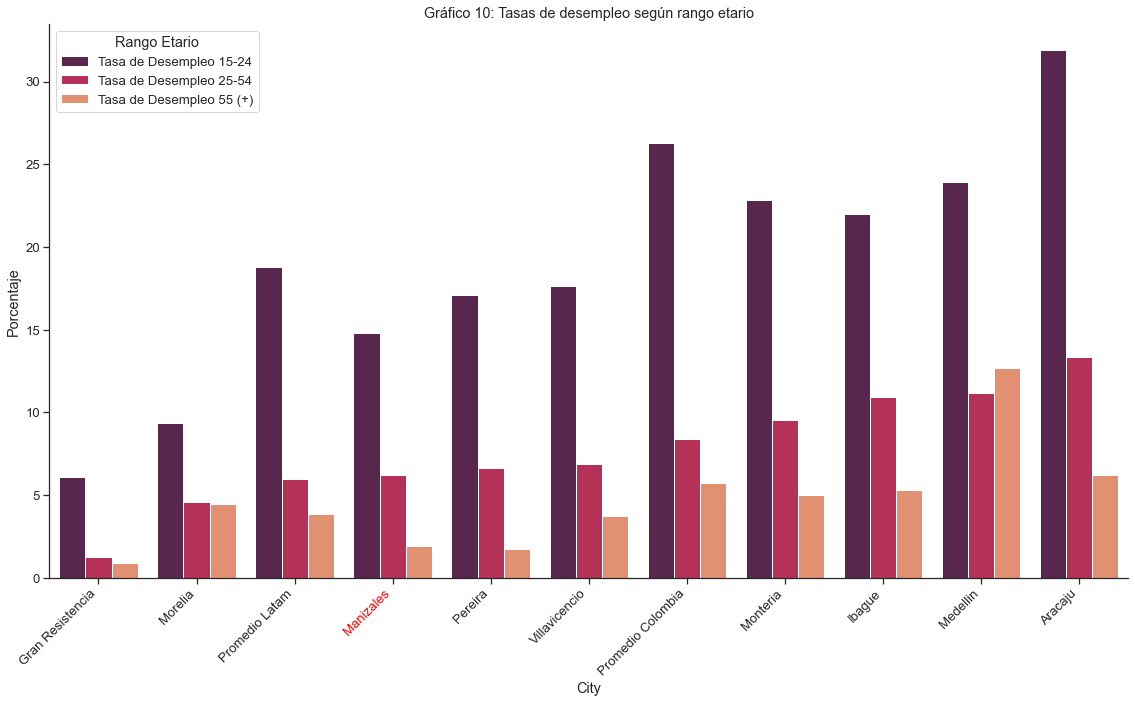

In [162]:
fig, ax = plt.subplots(figsize=(16,10))
g = sns.barplot(x=des_plot.index, y='Porcentaje', hue='Rango Etario', data=des_plot , palette='rocket' , linewidth=1)

g.set_title('Gráfico 10: Tasas de desempleo según rango etario')
g.set_xticklabels(des_plot.index.unique().tolist() , rotation=45 , ha='right')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()

#plt.legend(bbox_to_anchor=(1.05,1.05), loc="upper right")
plt.gca().get_xticklabels()[3].set_color('red')
plt.tight_layout()

plt.savefig("informe/images/des_etario.png",bbox_inches='tight')

Educación

In [163]:
edu = laboral_ref.loc[:,['% población con secundario completo Total','% población con superior completo Total']]

In [164]:
edu = edu.astype('float')

In [165]:
edu = edu.sort_values('% población con secundario completo Total')

In [166]:
edu['% población con secundario completo (total)'] = edu['% población con secundario completo Total'] * (-1)

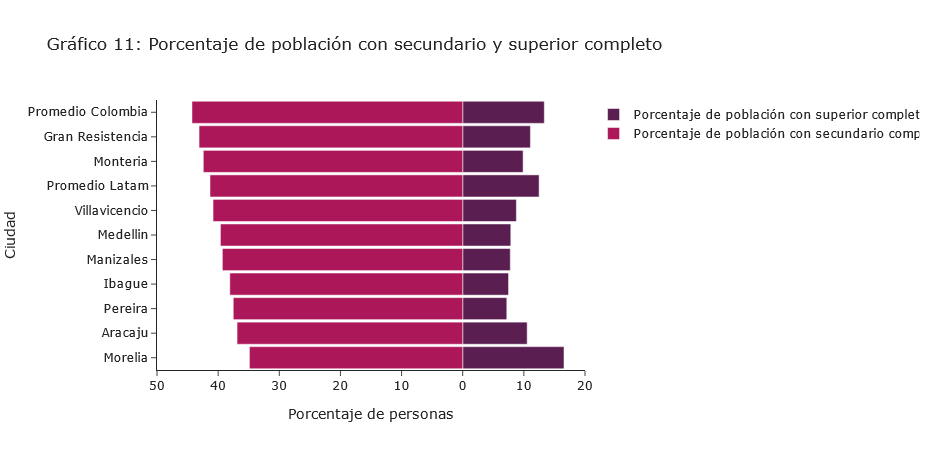

In [167]:
layout = go.Layout(yaxis=go.layout.YAxis(title='Ciudad'),
                   xaxis=go.layout.XAxis(
                       range=[-50, 20],
                       tickvals=[-50, -40, -30, -20, -10, 0, 10, 20],
                       ticktext=[50, 40, 30, 20, 10, 0, 10, 20],
                       title='Porcentaje de personas'),
                    barmode='overlay',
                    bargap=0.1,
                    template="simple_white",
                   title='Gráfico 11: Porcentaje de población con secundario y superior completo'
                  )

data = [go.Bar(y=edu.index,
               x=edu['% población con superior completo Total'],
               orientation='h',
               name='Porcentaje de población con superior completo',
               text=np.round(edu['% población con superior completo Total'].to_numpy(),2),
               hoverinfo='text',
               marker=dict(color=colors[4]),
                    #hoverlabel=dict(hover_data={act['dif']:':.2f'})
               ),
        go.Bar(y=edu.index,
               x=edu['% población con secundario completo (total)'],
               orientation='h',
               name='Porcentaje de población con secundario completo',
               text= np.round(edu['% población con secundario completo (total)'].to_numpy() * -1,2),
               hoverinfo='text',
               marker=dict(color=colors[8])
               )]

fig = go.Figure(
                data=data,
                layout=layout
)

fig.write_html(file="informe/images/edu1.html",full_html=False,include_plotlyjs='cdn')
fig.show()

In [168]:
edu2 = laboral_ref.loc[:,['% población con superior completo 25 a 35 años de edad','% población con secundario completo % población 18-25 años  que se encuentra estudiando nivel superior o terciario']].sort_values('% población con superior completo 25 a 35 años de edad')

In [169]:
edu2 = edu2.rename(columns={'% población con superior completo 25 a 35 años de edad':'25-35 años con superior completo','% población con secundario completo % población 18-25 años  que se encuentra estudiando nivel superior o terciario':'18-25 años estudiando terciario/superior'})

In [170]:
edu_plot2 = edu2.stack().to_frame().reset_index().rename(columns={'level_1':'Grupo',0:'Porcentaje'}).set_index(['City'])

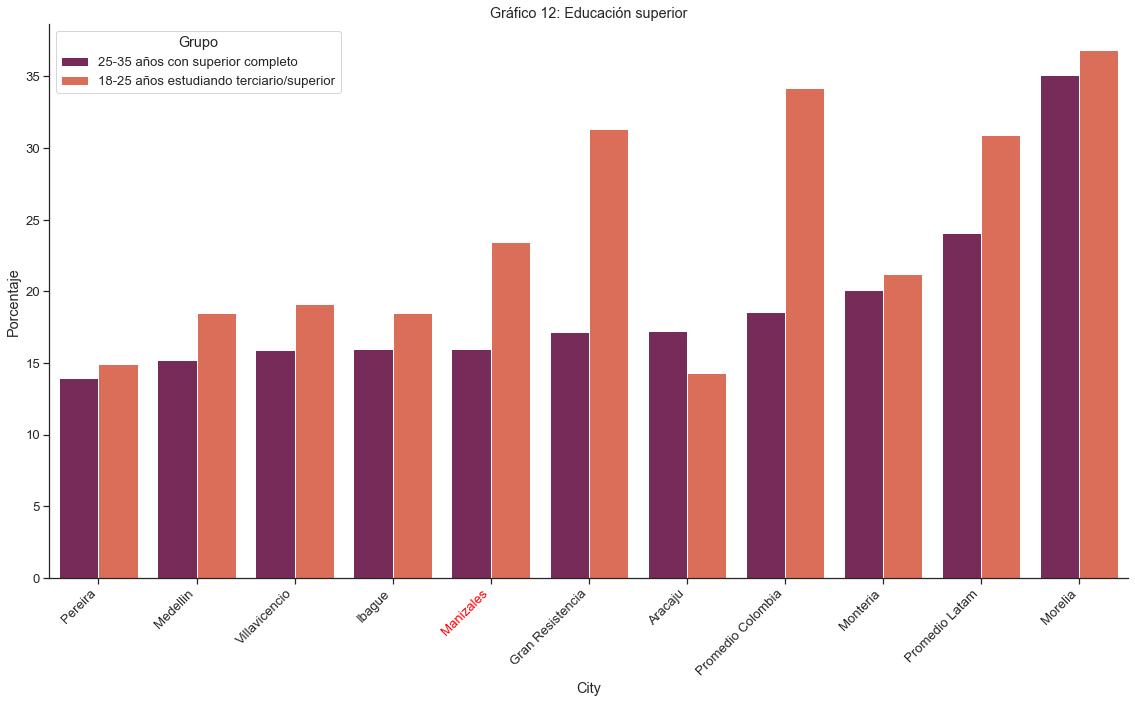

In [171]:
fig, ax = plt.subplots(figsize=(16,10))
g = sns.barplot(x=edu_plot2.index, y='Porcentaje', hue='Grupo', data=edu_plot2 , palette='rocket' , linewidth=1)

g.set_title('Gráfico 12: Educación superior')
g.set_xticklabels(edu_plot2.index.unique().tolist() , rotation=45 , ha='right')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()
#plt.legend(bbox_to_anchor=(1.05,1.05), loc="upper right")
plt.tight_layout()
plt.gca().get_xticklabels()[4].set_color('red')

plt.savefig("informe/images/edu2.png",bbox_inches='tight')

### Conglomerados y Cadenas de Valor

In [173]:
hh = laboral.loc['Colombia','Salario Horario (PPP 2011)'].to_frame().drop(index='Colombia 2018 (total ciudades)').join(sectores.loc[:,['Salario Estimado','HHc/HHp']])

In [174]:
hh = hh.reset_index()

In [175]:
hh = hh.rename(columns={'HHc/HHp':'Índice HH / Índice HH país','Salario Horario (PPP 2011)':'Salario Horario (USD)'})

In [176]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.005, point['y'], str(point['val']))

In [177]:
hh = hh.drop(columns='Country')

In [178]:
hh1 = hh.drop(index=hh[hh['City']=='Gran Cordoba'].index)

In [180]:
hh2 = hh[hh['City']=='Manizales']

In [181]:
len(sns.color_palette('rocket',1))

1

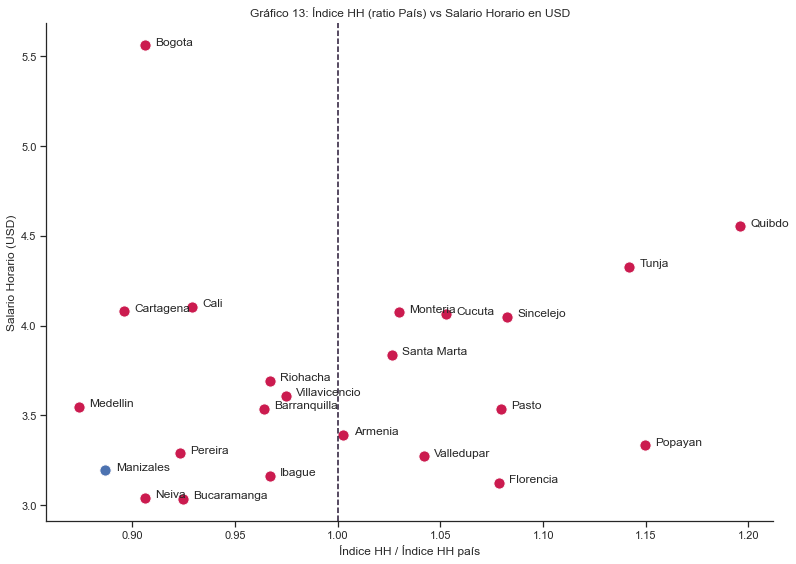

In [183]:
fig, ax = plt.subplots(figsize=(11,8))

sns.scatterplot(data=hh1, x="Índice HH / Índice HH país", y="Salario Horario (USD)" , ax=ax  , s=125 , c=sns.color_palette('rocket',1)).set_title('Gráfico 13: Índice HH (ratio País) vs Salario Horario en USD') #, hue="Principal Sector (3 principales)",   size="Principal Sector (3 principales)" 
sns.scatterplot(data=hh2, x="Índice HH / Índice HH país", y="Salario Horario (USD)" , ax=ax  , s=125)

#plt.legend(bbox_to_anchor=(0.95,0.95), loc="upper right")
plt.tight_layout()
sns.set(font_scale=1.0)
sns.set_style("ticks")
sns.despine()
plt.axvline(x=1,linestyle='--',c=colors[1])

label_point( hh["Índice HH / Índice HH país"] , hh["Salario Horario (USD)"] , hh['City'] , ax)

plt.savefig("informe/images/hh_salario.png",bbox_inches='tight')

# Distribución de masa salarial, empleo y salarios

In [234]:
e = sectores.iloc[:,10:20]

In [235]:
emedias = e.mean().to_frame().T.append(e.loc['Colombia'].mean().to_frame().T)

In [236]:
emedias['City'] = ['Promedio Latam','Promedio Colombia']

In [237]:
e = e.droplevel(0).append(emedias.set_index('City'))

In [238]:
eplot = e.loc[ref_prom]

In [239]:
eplot = eplot.rename(columns=dict(zip(eplot.columns.tolist(),[sectores.columns[31:41].tolist()[e] for e in range(10)])))

In [240]:
eplot['df']='Empleo'

In [241]:
eplot = eplot.loc[['Manizales','Promedio Colombia','Promedio Latam']].append(eplot.loc[eplot.index.difference(pd.Index(['Manizales','Promedio Colombia','Promedio Latam']))])

In [242]:
ms = sectores.iloc[:,31:41]

In [243]:
msmedias = ms.mean().to_frame().T.append(ms.loc['Colombia'].mean().to_frame().T)

In [244]:
msmedias['City'] = ['Promedio Latam','Promedio Colombia']

In [245]:
ms = ms.droplevel(0).append(msmedias.set_index('City'))

In [246]:
msplot = ms.loc[ref_prom]

In [247]:
msplot['df']='Masa Salarial'

In [248]:
msplot = msplot.loc[['Manizales','Promedio Colombia','Promedio Latam']].append(msplot.loc[msplot.index.difference(pd.Index(['Manizales','Promedio Colombia','Promedio Latam']))])

In [249]:
df = pd.concat([pd.melt(eplot.reset_index().rename(columns={'index':'City'}),id_vars=['df','City']),pd.melt(msplot.reset_index().rename(columns={'index':'City'}),id_vars=['df','City'])],ignore_index=True)

In [250]:
df = df.set_index(['df','City','variable'])

In [251]:
df["vcs"] = df.groupby(level=["df","City"]).cumsum()

In [252]:
df = df.reset_index()

In [253]:
df = df.replace({'Promedio Latam':'P. Latam','Promedio Colombia':'P. Colombia'})

In [254]:
colors2 = [colors[e] for e in range(0,20,2)]

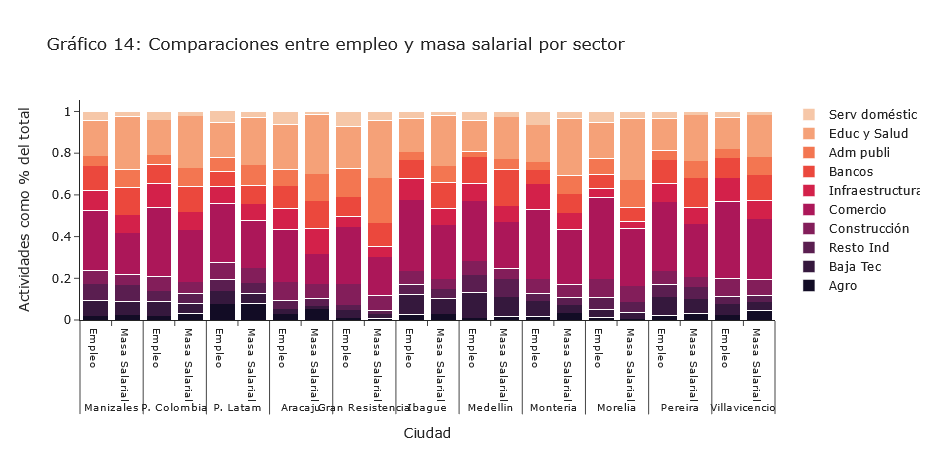

In [268]:
fig = go.Figure()

fig.update_layout(
    template="simple_white",
    xaxis=dict(title_text="Ciudad",tickfont_size=10),
    yaxis=dict(title_text="Actividades como % del total"),
    barmode="stack",
    title_text='Gráfico 14: Comparaciones entre empleo y masa salarial por sector'
)


for r, c in zip(df.variable.unique(), colors2):
    plot_df = df[df.variable == r]
    fig.add_trace(
        go.Bar(x=[plot_df.City, plot_df.df], y=plot_df.value, name=r, marker_color=c),
    )

fig.update_layout() 
fig.write_html("informe/images/empleoymasasalarial.html",full_html=False,include_plotlyjs='cdn')
fig.show()

Salarios

In [269]:
salarios = sectores.loc[:,['wages_ s{}'.format(e) for e in range(1,11)]]

In [270]:
salariosm = salarios.mean().to_frame().T.append(salarios.loc['Colombia'].mean().to_frame().T)

In [271]:
salariosm['City'] = ['Promedio Colombia','Promedio Latam']

In [272]:
salariosm = salariosm.set_index(['City'])

In [273]:
salarios = salarios.droplevel(0).append(salariosm)

In [274]:
salarios = salarios.loc[ref_prom]

In [275]:
salarios['color'] = colors[10]

In [276]:
salarios.at['Manizales','color'] = colors[1]

In [277]:
mydict=dict(zip(salarios.columns.tolist()[:-1],sectores.iloc[:5,31:41].columns.tolist()))

In [278]:
plot = pd.melt(salarios.reset_index().rename(columns=mydict),id_vars=['City','color']).rename(columns={'variable':'Actividad','value':'Salario'})

In [279]:
df_dict={}

for v in plot['Actividad'].unique():
    df_dict[v] = plot[plot['Actividad']==v].sort_values('Salario')

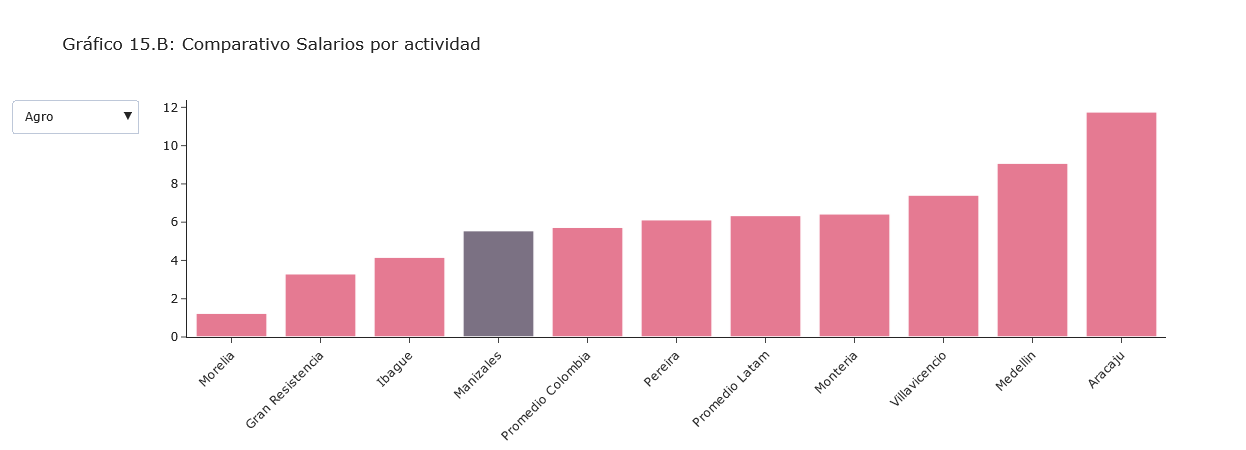

In [281]:
fig = go.Figure(data=[go.Bar( x=df_dict[list(df_dict.keys())[0]]['City'], y=df_dict[list(df_dict.keys())[0]]['Salario'] , marker={'color': df_dict[list(df_dict.keys())[0]]['color']})
                     ])

updatemenus = [{'buttons': [
            {
                'method': 'update',
                'label': list(df_dict.keys())[0],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[0]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[0]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[0]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[1],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[1]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[1]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[1]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[2],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[2]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[2]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[2]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[3],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[3]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[3]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[3]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[4],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[4]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[4]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[4]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[5],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[5]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[5]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[5]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[6],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[6]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[6]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[6]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[7],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[7]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[7]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[7]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[8],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[8]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[8]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[8]]['color']}]
                    }]
            },
            {
                'method': 'update',
                'label': list(df_dict.keys())[9],
                'args': [
                    {'y': [df_dict[list(df_dict.keys())[9]]['Salario']],
                     'x': [df_dict[list(df_dict.keys())[9]]['City']],
                     'marker':[{'color': df_dict[list(df_dict.keys())[9]]['color']}]
                    }               
                ]
            }

        ],
        'direction': 'down',
        'showactive': True,
    }
]

fig.update_layout(template="simple_white" , updatemenus=updatemenus , title_text='Gráfico 15.B: Comparativo Salarios por actividad' , xaxis={'tickangle':-45})
fig.update_traces(marker_line_width=1.5, opacity=0.6)

fig.show()
fig.write_html("informe/images/wages.html",full_html=False,include_plotlyjs='cdn')

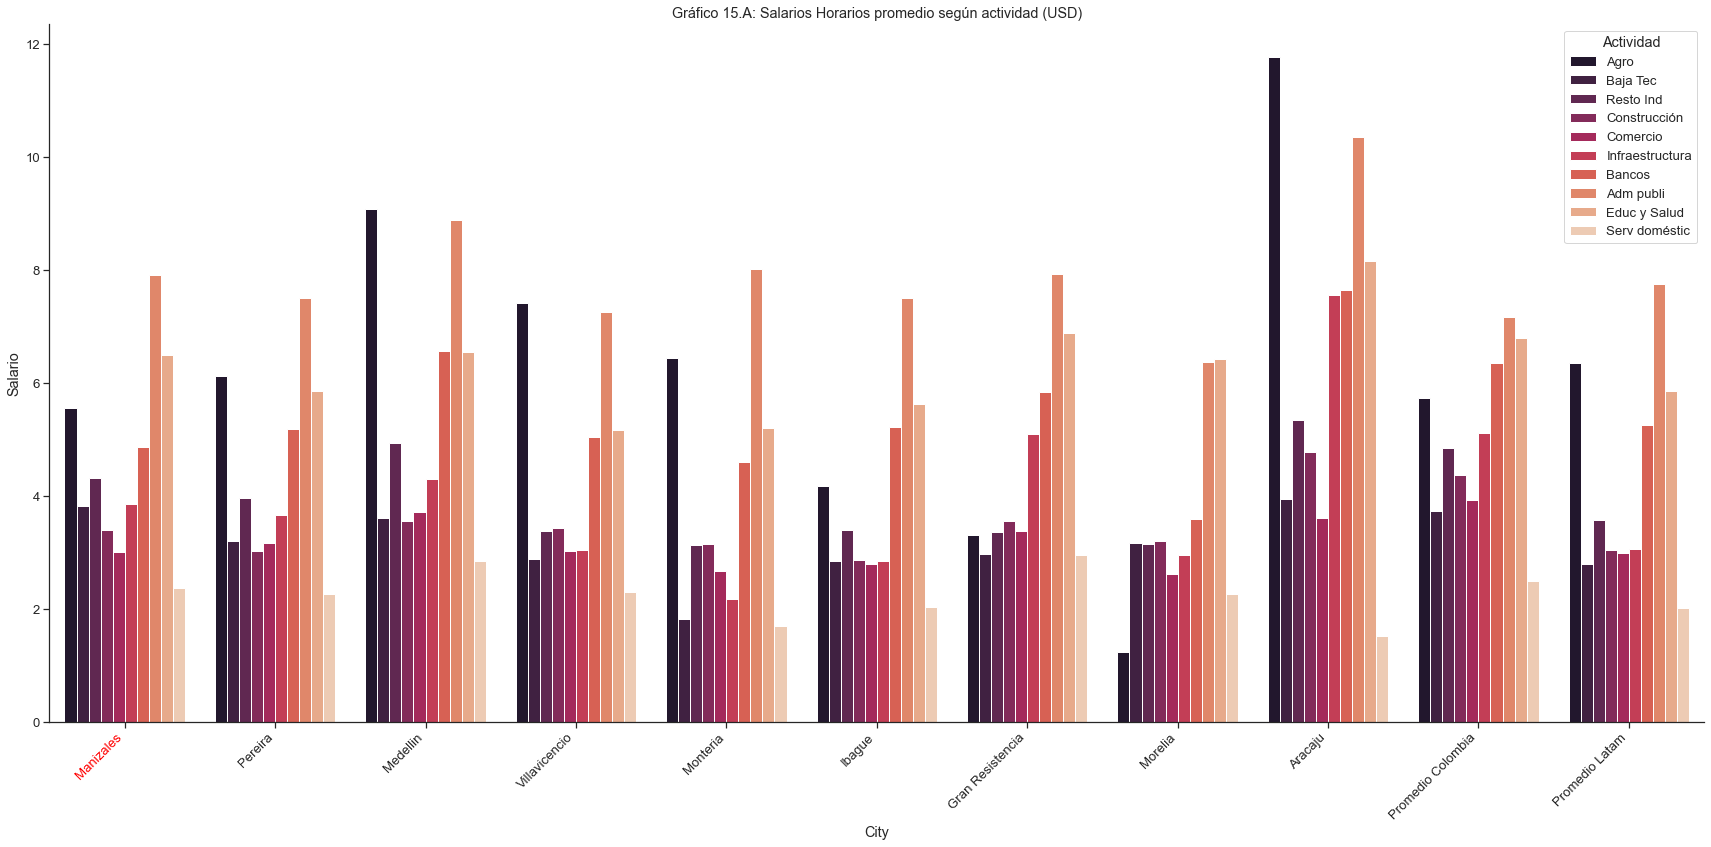

In [401]:
fig, ax = plt.subplots(1,1,figsize=(24,12)) #,constrained_layout=True

sns.barplot(x='City', y='Salario', hue='Actividad', data=plot , ax = ax, palette='rocket').set_title('Gráfico 15.A: Salarios Horarios promedio según actividad (USD)')

#ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax.legend(loc=(0.75,0.75))
ax.set_xticklabels(plot['City'].unique().tolist() , rotation=45 , ha='right')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()
plt.tight_layout()
plt.gca().get_xticklabels()[0].set_color('red')

plt.savefig("informe/images/salarios.png",bbox_inches='tight')

### Facilitación de Negocios

Doing Bix

Doing BIZ Extra

In [352]:
dbp = db[db.columns[db.columns.str.contains('Días')].tolist()]

Doing BIZ II

In [371]:
means = dbp.loc[['Colombia','Mexico','Peru']].groupby('Country').mean()

In [372]:
means['City'] = ['Promedio Colombia','Promedio Mexico','Promedio Peru']

In [373]:
means = means.reset_index().set_index(['Country','City'])

In [380]:
ref_db = ref + ['Promedio Colombia','Promedio Peru','Promedio Mexico','Varsovia','Madrid','Roma','Dublin','Atenas','Bogota']

In [382]:
db_plot = dbp.append(means).loc[idx[:,ref_db],:]

In [384]:
dp = pd.melt(db_plot.reset_index(),id_vars=['City'], value_vars=['Días permiso de construcción','Días registro de propiedad','Días comienzo de negocio'])

In [387]:
cl = [e for e in sns.color_palette('rocket',15)]
cl2 = [(int(t[0]*255), int(t[1]*255) , int(t[2]*255)) for t in cl]
colors = ['#%02x%02x%02x' % e for e in cl2]

In [390]:
dp['color'] = colors[3]

In [397]:
dp.loc[dp['City']=='Manizales','color'] = colors[11]

In [399]:
df1=dp[dp['variable']=='Días permiso de construcción'].sort_values('value').dropna()
df2=dp[dp['variable']=='Días registro de propiedad'].sort_values('value').dropna()
df3=dp[dp['variable']=='Días comienzo de negocio'].sort_values('value').dropna()

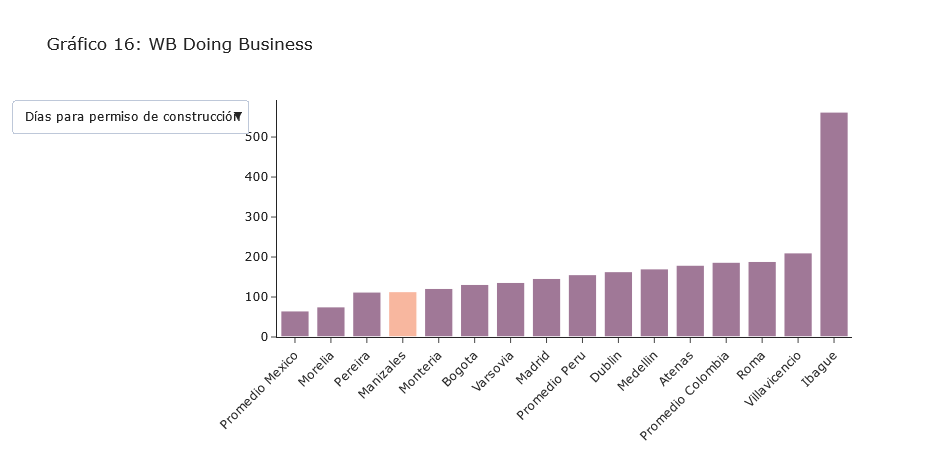

In [400]:
fig = go.Figure(data=[go.Bar( x=df1['City'], y=df1['value'] , marker={'color': df1['color']})
                     ])

updatemenus = [
    {
        'buttons': [
            {
                'method': 'update',
                'label': 'Días para permiso de construcción',
                'args': [
                    {'y': [df1['value']],
                     'x': [df1['City']],
                     'marker':[{'color': df1['color']}]
                    },  
                ]
            },
            {
                'method': 'update',
                'label': 'Días para registro de propiedad',
                'args': [
                    {'y': [df2['value']],
                     'x': [df2['City']],
                     'marker':[{'color': df2['color']}]
                    },
                ]
            },
            {
                'method': 'update',
                'label': 'Días para comienzo de negocio',
                'args': [
                    {'y': [df3['value']],
                     'x': [df3['City']],
                     'marker':[{'color': df3['color']}]
                    },
                ]
            }
        ],
        'direction': 'down',
        'showactive': True,
    }
]

fig.update_layout(template="simple_white" , updatemenus=updatemenus , title_text='Gráfico 16: WB Doing Business' , xaxis={'tickangle':-45})
fig.update_traces(marker_line_width=1.5, opacity=0.6)

fig.show()
fig.write_html("informe/images/db.html",full_html=False,include_plotlyjs='cdn')

Homicidios

In [410]:
homicidios_ref = hom.loc[idx[:,ref],:].droplevel(0).sort_values('Homicidios cada 100.000 hab.')

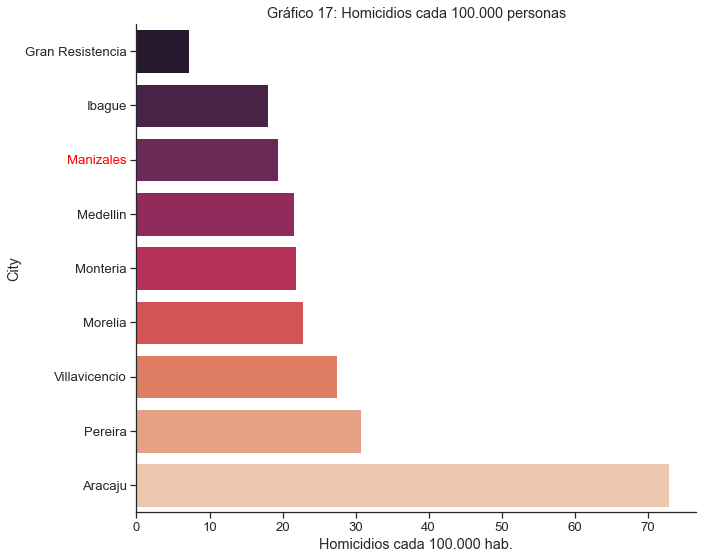

In [412]:
fig, ax = plt.subplots(figsize=(10,8)) #,constrained_layout=True
sns.barplot(x='Homicidios cada 100.000 hab.', y=homicidios_ref.index, data=homicidios_ref , palette='rocket' , orient='h' ).set_title('Gráfico 17: Homicidios cada 100.000 personas')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()
plt.tight_layout()
plt.gca().get_yticklabels()[2].set_color('red')

plt.savefig("informe/images/homicidios.png",bbox_inches='tight')

Properati

In [424]:
medias = prope_com.groupby(['Country','property_type']).mean()

In [436]:
ml =  medias.index.get_level_values(0).tolist()
medias['City'] = ['Promedio ' + e for e in ml]

In [441]:
medias = medias.reset_index().set_index(['Country','City'])

In [443]:
pcom = prope_com.append(medias)

In [445]:
refp = ref + ['Promedio Argentina','Promedio Colombia','Promedio Ecuador','Promedio Peru','Promedio Uruguay','Promedio Latam']

In [450]:
df = pcom.loc[idx[:,refp],['property_type','Precio x m2']].droplevel(0).reset_index()

In [452]:
cl = [e for e in sns.color_palette('rocket',20)]
cl2 = [(int(t[0]*255), int(t[1]*255) , int(t[2]*255)) for t in cl]
colors = ['#%02x%02x%02x' % e for e in cl2]

In [456]:
df['color'] = colors[3]

In [457]:
df.loc[df['City']=='Manizales','color'] = colors[11]

In [461]:
df1=df[df['property_type']=='Depósito'].sort_values('Precio x m2').dropna()
df2=df[df['property_type']=='Local comercial'].sort_values('Precio x m2').dropna()
df3=df[df['property_type']=='Oficina'].sort_values('Precio x m2').dropna()

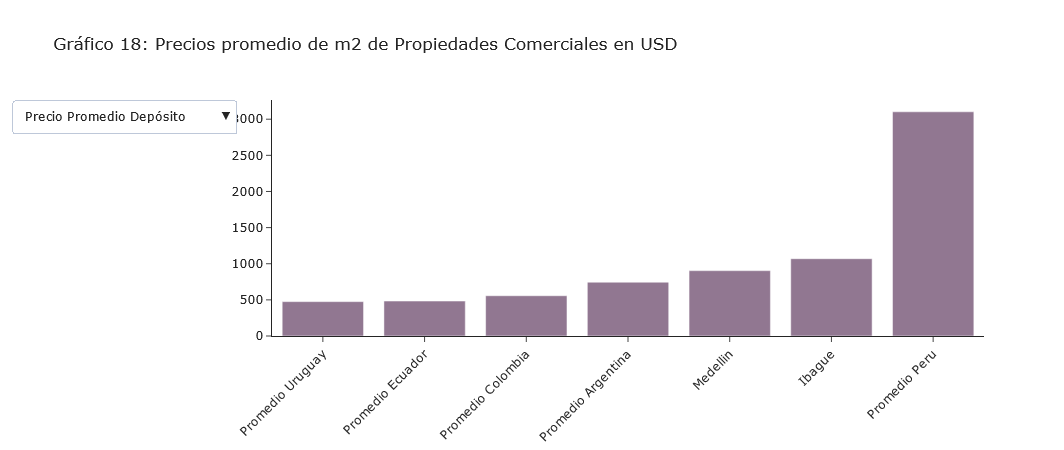

In [462]:
fig = go.Figure(data=[go.Bar( x=df1['City'], y=df1['Precio x m2'] , marker={'color': df1['color']})
                     ])

updatemenus = [
    {
        'buttons': [
            {
                'method': 'update',
                'label': 'Precio Promedio Depósito',
                'args': [
                    {'y': [df1['Precio x m2']],
                     'x': [df1['City']],
                     'marker':[{'color': df1['color']}]
                    },  
                ]
            },
            {
                'method': 'update',
                'label': 'Precio Promedio Local comercial',
                'args': [
                    {'y': [df2['Precio x m2']],
                     'x': [df2['City']],
                     'marker':[{'color': df2['color']}]
                    },
                ]
            },
            {
                'method': 'update',
                'label': 'Precio Promedio Oficina',
                'args': [
                    {'y': [df3['Precio x m2']],
                     'x': [df3['City']],
                     'marker':[{'color': df3['color']}]
                    },
                ]
            }
        ],
        'direction': 'down',
        'showactive': True,
    }
]

fig.update_layout(template="simple_white" , updatemenus=updatemenus , title_text='Gráfico 18: Precios promedio de m2 de Propiedades Comerciales en USD' , xaxis={'tickangle':-45})
fig.update_traces(marker_line_width=1.5, opacity=0.6)

fig.show()
fig.write_html("informe/images/prope.html",full_html=False,include_plotlyjs='cdn')

#### Sueldos x vivienda (promedio)

In [466]:
mcon = prope_vi['Cantidad de salarios mensuales para adquirir Propiedad 60m2'].to_frame().groupby('Country').mean()
mcon['City'] = ['Promedio Argentina','Promedio Colombia','Promedio Ecuador','Promedio Peru','Promedio Uruguay']
mcon = mcon.reset_index().set_index(['Country','City'])

In [469]:
m = pd.DataFrame({'Country':['Latam'],'City':['Promedio Latam'],'Cantidad de salarios mensuales para adquirir Propiedad 60m2':[prope_vi['Cantidad de salarios mensuales para adquirir Propiedad 60m2'].mean()]}).set_index(['Country','City'])

In [470]:
refp = ref + ['Promedio Argentina','Promedio Colombia','Promedio Ecuador','Promedio Peru','Promedio Uruguay','Promedio Latam']

In [472]:
wagexcasa = prope_vi.append(m).append(mcon).loc[idx[:,refp],'Cantidad de salarios mensuales para adquirir Propiedad 60m2'].droplevel(0).to_frame().sort_values('Cantidad de salarios mensuales para adquirir Propiedad 60m2')

In [473]:
wagexcasa['color'] = colors[10]
wagexcasa.at['Manizales','color'] = colors[1]
wagexcasa = wagexcasa.reset_index()

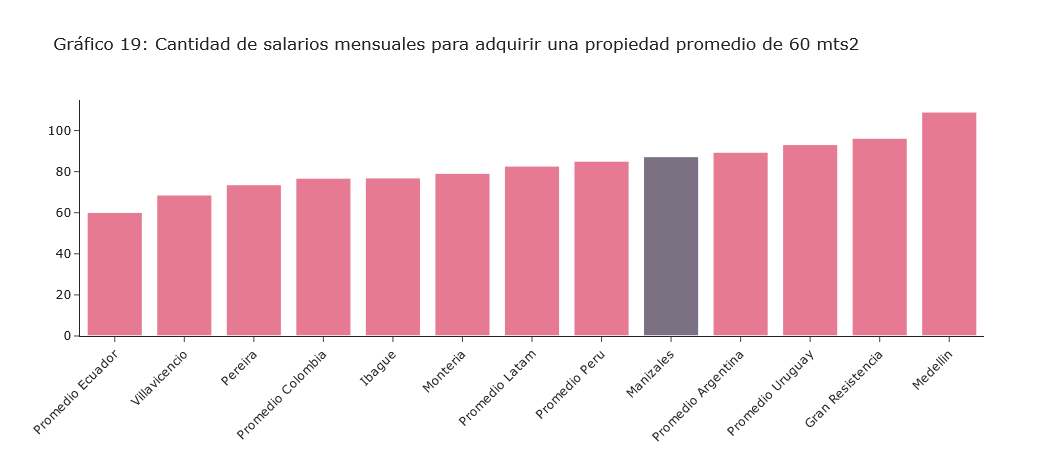

In [475]:
fig = go.Figure(data=[go.Bar(x=wagexcasa['City'], y=wagexcasa['Cantidad de salarios mensuales para adquirir Propiedad 60m2'] , marker={'color': wagexcasa['color']})])

fig.update_layout(template="simple_white" , title_text='Gráfico 19: Cantidad de salarios mensuales para adquirir una propiedad promedio de 60 mts2' , xaxis={'tickangle':-45})
fig.update_traces(marker_line_width=1.5, opacity=0.6)

fig.show()
fig.write_html("informe/images/vivienda.html",full_html=False,include_plotlyjs='cdn')

3 Biggest obstacles

In [507]:
es = pd.read_excel(dbox+'es.xlsx',index_col=[0,1])

In [508]:
cols = es.columns[1:-3].str.replace('Percent of firms choosing ','').str.replace(' as their biggest obstacle','')

In [509]:
mydict = dict(zip(es.columns[1:-3].tolist(),cols))

In [510]:
es = es.rename(columns=mydict)

In [511]:
bobs = es.drop(columns=['City old','City2','_merge','Year']).loc[('Argentina','Gran Cordoba')].sort_values(ascending=False).to_frame().T.T.droplevel(0, axis=1).rename(columns={'Gran Cordoba':'Porcentaje de Firmas'})

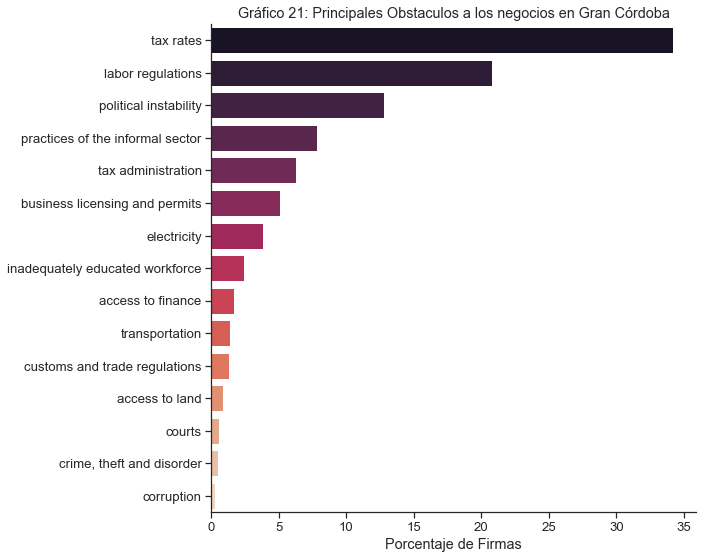

In [513]:
fig, ax = plt.subplots(figsize=(10,8)) #,constrained_layout=True
sns.barplot(x='Porcentaje de Firmas', y=bobs.index, data=bobs , palette='rocket' , orient='h' ).set_title('Gráfico 21: Principales Obstaculos a los negocios en Gran Córdoba')

sns.set(font_scale=1.2)
sns.set_style("ticks")
sns.despine()

plt.tight_layout()
#plt.gca().get_yticklabels()[3].set_color('red')

plt.savefig("informe/images/biggest_obs.png",bbox_inches='tight')